In [ ]:
!pip install islp
import numpy as np
# Exemplo de dados
X = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70,
1.73, 1.75, 1.78, 1.80, 1.83])
y = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,
63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=7cf2c69e098dcc05e5e508404c009c6091de25f1468025834977f155fe3e952b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

61.272186542107434
-39.061955918838656


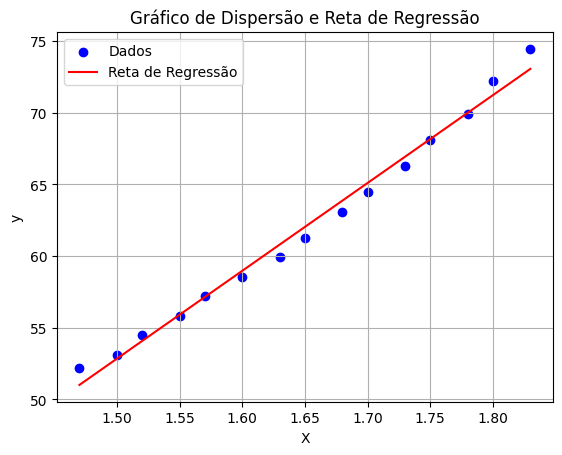

0.7590762809485331
0.9891969224457969


In [ ]:
import matplotlib.pyplot as plt
import math

b0 = 0
b1 = 0
n = np.size(X)
sumx = np.sum(X)
sumy = np.sum(y)
sumxy = np.sum(X*y)
sumxsquared = np.sum(X*X)

b1 = (n * sumxy - sumx * sumy)/(n*sumxsquared - sumx*sumx)
b0 = (sumy - b1*sumx)/n

print(b1)
print(b0)

x_fit = np.linspace(np.min(X), np.max(X), n)
y_fit = b0 + b1 * x_fit

plt.scatter(X, y, color='blue', label='Dados')
plt.plot(x_fit, y_fit, color='red', label='Reta de Regressão')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gráfico de Dispersão e Reta de Regressão')
plt.legend()
plt.grid()
plt.show()

ymean = np.mean(y)
aux1 = 0
aux2 = 0

for k in range(0, n):
  aux1 += (y[k] - (b1*X[k] + b0))*(y[k] - (b1*X[k] + b0))
  aux2 += (y[k] - ymean)*(y[k] - ymean)

RSE = math.sqrt(aux1/(n-2))

print(RSE)

RSQUARED = 1-aux1/aux2

print(RSQUARED)

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

# Carregar o dataset de gorjetas
df = sns.load_dataset('tips')
# Mostrar as primeiras linhas do DataFrame
print(df.head())
# Selecionar a variável independente (total_bill) e a variável dependente (tip)
X = df[['total_bill']] # Total da conta
y = df['tip'] # Gorjeta
# Dividir os dados em treino e teste
def train_test_split(X, y, test_size, random_state):
  X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test

train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
X = df[['balance', 'student', 'income']]
y = df['default']


Coeficientes da Regressão Linear:
b1 (coeficiente angular): 0.10696370685268647
b0 (intercepto): 0.9252355585570583


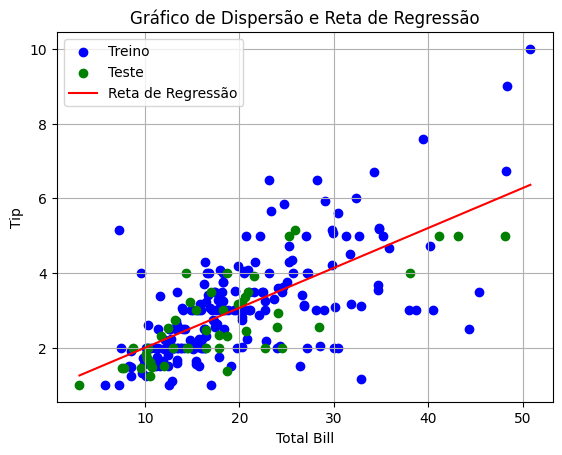

Erro Padrão da Estimativa (RSE) no conjunto de teste: 0.7700773433554986
Coeficiente de Determinação (R²) no conjunto de teste: 0.5449381659234663
Valor esperado para 80: 9.482332106771977


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

# Carregar o dataset de gorjetas
df = sns.load_dataset('tips')

# Selecionar a variável independente (total_bill) e a variável dependente (tip)
X = df[['total_bill']].values.flatten()  # Transformar em vetor 1D
y = df['tip'].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cálculo dos coeficientes b0 e b1 usando X_train e y_train
n_train = len(X_train)
sumx_train = np.sum(X_train)
sumy_train = np.sum(y_train)
sumxy_train = np.sum(X_train * y_train)
sumxsquared_train = np.sum(X_train * X_train)

b1 = (n_train * sumxy_train - sumx_train * sumy_train) / (n_train * sumxsquared_train - sumx_train * sumx_train)
b0 = (sumy_train - b1 * sumx_train) / n_train

# Exibir os coeficientes b0 e b1
print("Coeficientes da Regressão Linear:")
print("b1 (coeficiente angular):", b1)
print("b0 (intercepto):", b0)

# Geração dos valores de ajuste para o conjunto de treino
x_fit = np.linspace(np.min(X), np.max(X), len(X))
y_fit = b0 + b1 * x_fit

# Plotar os dados de treino e teste com cores diferentes
plt.scatter(X_train, y_train, color='blue', label='Treino')
plt.scatter(X_test, y_test, color='green', label='Teste')
plt.plot(x_fit, y_fit, color='red', label='Reta de Regressão')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Gráfico de Dispersão e Reta de Regressão')
plt.legend()
plt.grid()
plt.show()

# Cálculo de RSE e R² no conjunto de teste
n_test = len(X_test)
ymean_test = np.mean(y_test)
aux1 = 0
aux2 = 0

for i in range(n_test):
    aux1 += (y_test[i] - (b1 * X_test[i] + b0)) ** 2
    aux2 += (y_test[i] - ymean_test) ** 2

RSE_test = math.sqrt(aux1 / (n_test - 2))
RSQUARED_test = 1 - aux1 / aux2

# Exibir RSE e R² para o conjunto de teste
print("Erro Padrão da Estimativa (RSE) no conjunto de teste:", RSE_test)
print("Coeficiente de Determinação (R²) no conjunto de teste:", RSQUARED_test)
print("Valor esperado para 80: " + str(b0 + b1*80))
